In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<b>Import data from csv into dataframe</b>

In [2]:
df = pd.read_csv('911.csv')
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


Check the data structure

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB



<b>Data Wrangling </b>: Befor analysis, it is importnet to ensure there are no incorrect/missing data that could bias our result. It is called sample correction.

In [4]:
df.isnull().sum()

lat              0
lng              0
desc             0
zip          12855
title            0
timeStamp        0
twp             43
addr           519
e                0
dtype: int64

<b>Conclusion1:</b> We Need to ignore the record which have not township/zip details. 

Remove null zip record

In [5]:
df_wrang_zip = df[pd.notnull(df['zip'])]
df_wrang_zip.isnull().sum()

lat           0
lng           0
desc          0
zip           0
title         0
timeStamp     0
twp          14
addr         47
e             0
dtype: int64

Remove null twp records 

In [6]:
df_wrang = df_wrang_zip[pd.notnull(df_wrang_zip['twp'])]
df_wrang.isnull().sum() #Create unbias dataset for analysis

lat           0
lng           0
desc          0
zip           0
title         0
timeStamp     0
twp           0
addr         47
e             0
dtype: int64

Data Structure about final dataset after Data Wrangling

In [7]:
df_wrang.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86623 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        86623 non-null  float64
 1   lng        86623 non-null  float64
 2   desc       86623 non-null  object 
 3   zip        86623 non-null  float64
 4   title      86623 non-null  object 
 5   timeStamp  86623 non-null  object 
 6   twp        86623 non-null  object 
 7   addr       86576 non-null  object 
 8   e          86623 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.6+ MB


<b>Analysis Begins</b>

In [8]:
df_wrang.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 17:40:01,LANSDALE,CANNON AVE & W 9TH ST,1


<b>Top 10 zipcodes for 911 calls</b>

In [9]:
df_wrang['zip'].value_counts().head(10)

19401.0    6977
19464.0    6642
19403.0    4854
19446.0    4748
19406.0    3173
19002.0    3050
19468.0    2990
19454.0    2781
19090.0    2635
19038.0    2578
Name: zip, dtype: int64

<b>Top 4 township (twp) for 911 calls</b>

In [10]:
df_wrang['twp'].value_counts().head(4)

LOWER MERION    7202
ABINGTON        5675
NORRISTOWN      5610
POTTSTOWN       4030
Name: twp, dtype: int64

<b>Unique Count of Emergency(title)</b>

In [11]:
df_wrang['title'].nunique()

107

<b>What is the most common Reason for a 911 call based on Reason Column? Which comes second </b>

Create two different field from existing data frame named as department and Reason

In [12]:
df_wrang['Department']=df_wrang['title'].apply(lambda val:val.split(':')[1])
df_wrang['Reason']=df_wrang['title'].apply(lambda val:val.split(':')[0])
df_wrang.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Department,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,BACK PAINS/INJURY,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,DIABETIC EMERGENCY,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,GAS-ODOR/LEAK,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,CARDIAC EMERGENCY,EMS
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 17:40:01,LANSDALE,CANNON AVE & W 9TH ST,1,HEAD INJURY,EMS


<b>Check Unique Reason</b>

In [13]:
df_wrang['Reason'].unique()

array(['EMS', 'Fire', 'Traffic'], dtype=object)

<b>Check Unique Department</b>

In [14]:
df_wrang['Department'].unique()

array([' BACK PAINS/INJURY', ' DIABETIC EMERGENCY', ' GAS-ODOR/LEAK',
       ' CARDIAC EMERGENCY', ' HEAD INJURY', ' NAUSEA/VOMITING',
       ' RESPIRATORY EMERGENCY', ' SYNCOPAL EPISODE',
       ' VEHICLE ACCIDENT -', ' DIZZINESS', ' VEHICLE ACCIDENT',
       ' DISABLED VEHICLE -', ' APPLIANCE FIRE', ' GENERAL WEAKNESS',
       ' CARBON MONOXIDE DETECTOR', ' UNKNOWN MEDICAL EMERGENCY',
       ' UNRESPONSIVE SUBJECT', ' CVA/STROKE', ' FIRE ALARM',
       ' ROAD OBSTRUCTION -', ' SUBJECT IN PAIN', ' HEMORRHAGING',
       ' FALL VICTIM', ' ASSAULT VICTIM', ' SEIZURES',
       ' MEDICAL ALERT ALARM', ' ABDOMINAL PAINS', ' PUMP DETAIL',
       ' FIRE INVESTIGATION', ' OVERDOSE', ' MATERNITY',
       ' UNCONSCIOUS SUBJECT', ' CHOKING', ' LACERATIONS',
       ' TRASH/DUMPSTER FIRE', ' UNKNOWN TYPE FIRE', ' BUILDING FIRE',
       ' ELECTRICAL FIRE OUTSIDE', ' DEBRIS/FLUIDS ON HIGHWAY',
       ' DEBRIS/FLUIDS ON HIGHWAY -', ' FEVER', ' ALLERGIC REACTION',
       ' FRACTURE', ' RESCUE - GENERAL

<b>Conclusion:</b> There are <u>3 unique reasons</u> and <u>81 unique department</u> 

<b>Most Common Reason for 911 call with visual representation</b>

In [15]:
df_wrang['Reason'].value_counts()[:3]

EMS        44318
Traffic    29297
Fire       13008
Name: Reason, dtype: int64

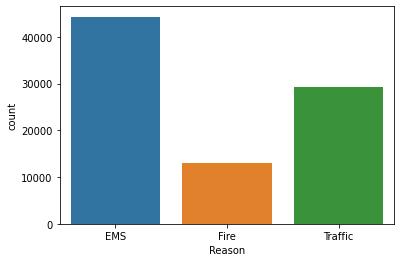

In [16]:
sns.countplot(x=df_wrang['Reason'])

<b>Top 5 department for emergency call with visual representation </b>

In [17]:
df_wrang['Department'].value_counts().head(5)

 VEHICLE ACCIDENT -       19536
 DISABLED VEHICLE -        5791
 FIRE ALARM                5148
 RESPIRATORY EMERGENCY     4810
 CARDIAC EMERGENCY         4686
Name: Department, dtype: int64

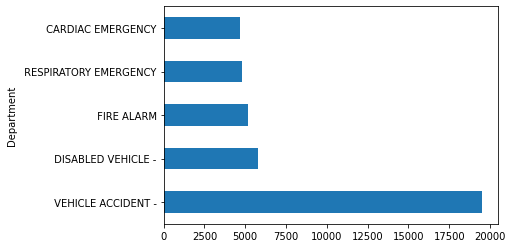

In [18]:
df_wrang.groupby('Department').count().sort_values('e',ascending=0)[:5]['e'].plot(kind='barh')

<b>Top 5 township for emergency calling with visual representation</b>

In [19]:
df_wrang['twp'].value_counts()[:5]

LOWER MERION    7202
ABINGTON        5675
NORRISTOWN      5610
POTTSTOWN       4030
CHELTENHAM      3942
Name: twp, dtype: int64

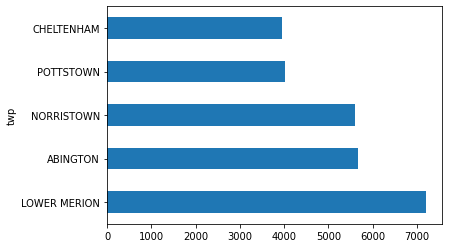

In [20]:
df_wrang.groupby('twp').count().sort_values('e',ascending=0)[:5]['e'].plot(kind='barh')

<b>Top 5 township with reasons via visual representation</b>  

In [21]:
tmplst = list(df_wrang['twp'].value_counts()[:5].index)
tmplst

['LOWER MERION', 'ABINGTON', 'NORRISTOWN', 'POTTSTOWN', 'CHELTENHAM']

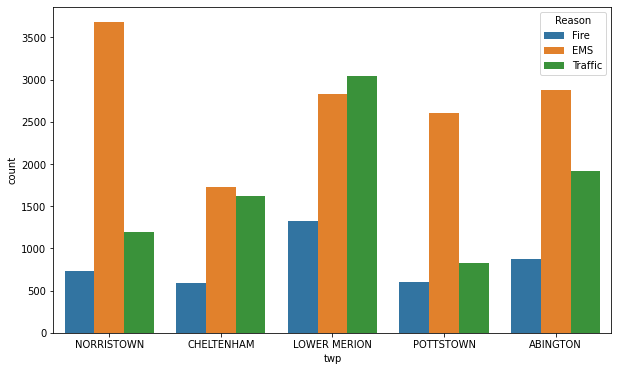

In [22]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_wrang[df_wrang['twp'].apply(lambda x:(True if x in tmplst else False))],x='twp',hue='Reason')

<b>DateTime Analysis for emergency call</b>

Convert string column to Datetime format

In [23]:
df_wrang['timeStamp'] = pd.to_datetime(df_wrang['timeStamp'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Create new column for Month, Day of week

In [24]:
df_wrang['Month'] = df_wrang['timeStamp'].apply(lambda x:x.month)
df_wrang['DayOfWeek'] = df_wrang['timeStamp'].apply(lambda x:x.dayofweek)
df_wrang.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Department,Reason,Month,DayOfWeek
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,BACK PAINS/INJURY,EMS,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,DIABETIC EMERGENCY,EMS,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,GAS-ODOR/LEAK,Fire,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,CARDIAC EMERGENCY,EMS,12,3
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 17:40:01,LANSDALE,CANNON AVE & W 9TH ST,1,HEAD INJURY,EMS,12,3


Convert Day of Week and month from number to words

In [25]:
daydict = {0:'Mon',1:'Tue',2:'Wed',3:'Thur',4:'Fri',5:'Sat',6:'Sun'}
df_wrang['DayOfWeek']  = df_wrang['DayOfWeek'].map(daydict)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [26]:
df_wrang.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Department,Reason,Month,DayOfWeek
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,BACK PAINS/INJURY,EMS,12,Thur
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,DIABETIC EMERGENCY,EMS,12,Thur
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,GAS-ODOR/LEAK,Fire,12,Thur
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,CARDIAC EMERGENCY,EMS,12,Thur
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 17:40:01,LANSDALE,CANNON AVE & W 9TH ST,1,HEAD INJURY,EMS,12,Thur


In [27]:
mondict = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
df_wrang['Month']=df_wrang['Month'].map(mondict)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [28]:
df_wrang.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Department,Reason,Month,DayOfWeek
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,BACK PAINS/INJURY,EMS,Dec,Thur
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,DIABETIC EMERGENCY,EMS,Dec,Thur
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,GAS-ODOR/LEAK,Fire,Dec,Thur
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,CARDIAC EMERGENCY,EMS,Dec,Thur
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 17:40:01,LANSDALE,CANNON AVE & W 9TH ST,1,HEAD INJURY,EMS,Dec,Thur


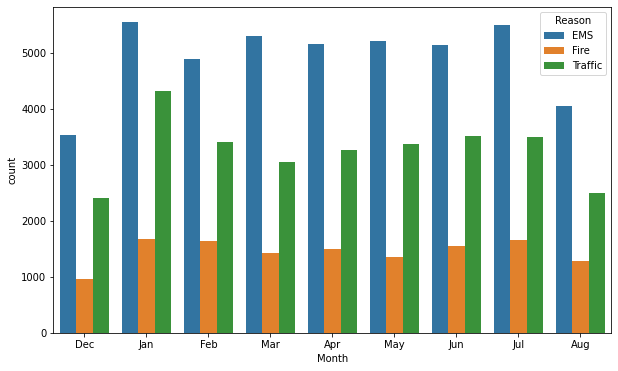

In [29]:
plt.figure(figsize=(10,6))
sns.countplot(x='Month',data=df_wrang,hue='Reason')

<b>Conclusion:<b> June --Barbeque and Holidays time received maximum Fire call

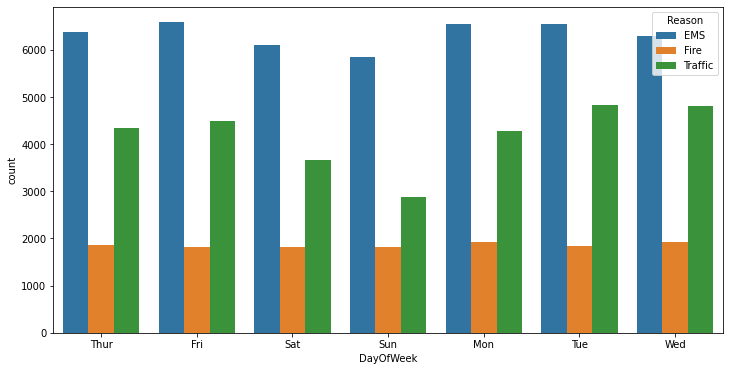

In [30]:
plt.figure(figsize=(12,6))
sns.countplot(x='DayOfWeek',data=df_wrang,hue='Reason')

<b>Conclusion:</b> As expected --Sunday always less traffic